In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import glob
import utils
import json

In [46]:
result_dirs = ["../../analysis_results_one/test/*.json", "../results/avoy/lstm_0.0.0/test_20200322-011702/*.json"]
result_paths = [sorted(list(glob.glob(agent_dir))) for agent_dir in result_dirs]

val_accs = [[.283, .598, .699, .719, .728], [.26, .55, .627, .669, .688, .709]] #MUST BE TEMPORALLY ORDERED

expert_paths = ["../../analysis_results_one/results_manually_composite.json", "../data/output/avoy/results_manually_composite.json"]
print(result_paths)

[['../../analysis_results_one/test\\results_bc_agent-20200322-155846.json', '../../analysis_results_one/test\\results_bc_agent-20200322-164709.json', '../../analysis_results_one/test\\results_bc_agent-20200322-173601.json', '../../analysis_results_one/test\\results_bc_agent-20200322-182525.json', '../../analysis_results_one/test\\results_bc_agent-20200322-191609.json'], ['../results/avoy/lstm_0.0.0/test_20200322-011702\\results_bc_agent-20200322-134529.json', '../results/avoy/lstm_0.0.0/test_20200322-011702\\results_bc_agent-20200322-143559.json', '../results/avoy/lstm_0.0.0/test_20200322-011702\\results_bc_agent-20200322-152601.json', '../results/avoy/lstm_0.0.0/test_20200322-011702\\results_bc_agent-20200322-161451.json', '../results/avoy/lstm_0.0.0/test_20200322-011702\\results_bc_agent-20200322-170414.json', '../results/avoy/lstm_0.0.0/test_20200322-011702\\results_bc_agent-20200322-200534.json']]


In [47]:
print(len(result_paths), len(result_paths[0]))

2 5


In [48]:
experts = ["A", "B"]
rewards = []; corrs = []

for exp, exp_name in enumerate(experts):
    rewards_dict = {}
    corrs_dict= {}
    for path_idx, path in enumerate(result_paths[exp]):
        agent = utils.read_json(path)
        agent_rewards = np.array(agent["episode_rewards"])
        rewards_dict[val_accs[exp][path_idx]] = (agent['mean'], agent['std'])

        corrs_dict[val_accs[exp][path_idx]] = utils.compute_correlation(expert_paths[exp], path)
        
    print(exp_name, rewards_dict, corrs_dict)
    
    rewards.append(rewards_dict)
    corrs.append(corrs_dict)

A {0.283: (-16.41548848955998, 23.39609750550683), 0.598: (749.4578466313878, 229.94765725433354), 0.699: (854.0700500940751, 103.25704059139852), 0.719: (824.8748249394333, 146.25845435461395), 0.728: (853.961593411634, 117.36206153425907)} {0.283: 0.0, 0.598: 0.5248668822326221, 0.699: 0.6418544716281814, 0.719: 0.4907962961449688, 0.728: 0.6330005094516399}
B {0.26: (-24.46062966326453, 18.37272264180538), 0.55: (429.308590818877, 182.67215294224124), 0.627: (627.1896057449574, 234.27613194359012), 0.669: (630.762304245477, 286.29771967858346), 0.688: (772.2674631812988, 201.77758405940543), 0.709: (738.2931622090674, 249.91262745328436)} {0.26: 0.0, 0.55: 0.23685323746880912, 0.627: 0.8342702181795635, 0.669: 0.8421781695485044, 0.688: 0.9196414644299776, 0.709: 0.9217421925225182}


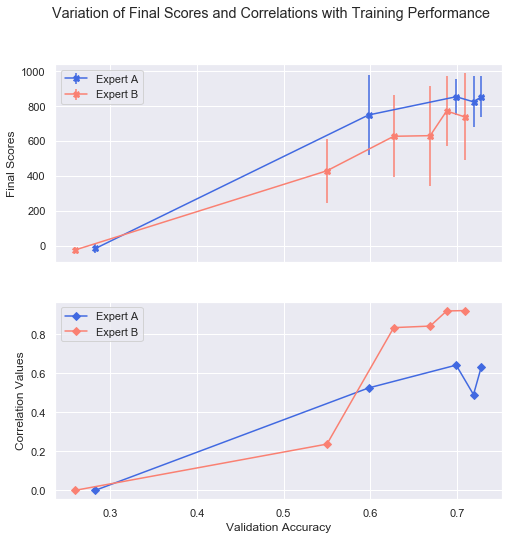

In [51]:
colors = ["royalblue", "salmon"]
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8,8))
fig.suptitle('Variation of Final Scores and Correlations with Training Performance')

for exp, exp_name in enumerate(experts):
    rewards_dict, corrs_dict = rewards[exp], corrs[exp]
    accs, means, stds, corr = [], [], [], []
    for k, v in rewards_dict.items():
        accs.append(k)
        means.append(v[0]); stds.append(v[1])
        corr.append(corrs_dict[k])
#     ax1.plot(accs, means, label=exp_name, colors[exp])
#     ax1.scatter(accs, means, std=)
    ax1.errorbar(accs, means, yerr=stds, marker='X', label="Expert "+exp_name, color=colors[exp])
#     ax2.plot(accs, corr, color=colors[exp])
    ax2.errorbar(accs, corr, yerr=None, marker='D', label="Expert "+exp_name, color=colors[exp])

ax1.set_ylabel("Final Scores")
ax1.legend()

ax2.set_ylabel("Correlation Values")
ax2.legend()
plt.xlabel("Validation Accuracy")
plt.show()

In [44]:
utils.compute_correlation(expert_paths[1], "../results/avoy/baseline/20200323-023029/results_bc_agent-20200322-234309.json")

0.7580856663669485